In [1]:
import numpy as np

In [2]:
x_train = np.load('x_train_ann.npy',allow_pickle=True)
x_test = np.load('x_test_ann.npy',allow_pickle=True)
y_train = np.load('y_train_ann.npy',allow_pickle=True)
y_test = np.load('y_test_ann.npy',allow_pickle=True)

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(17835, 19200) (17835, 15) (4459, 19200) (4459, 15)


In [4]:
class NeuralNetwork:
    
    def __init__(self, X, y, val_x, val_y, classes):
        self.X = X
        self.y = y
        self.val_x = val_x
        self.val_y = val_y
        self.H1_size = 256
        self.H2_size = 64
        self.OUTPUT_SIZE = classes
        self.INPUT_SIZE = X.shape[1]
        self.losses = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
        
        # Initialize weights
        self.weight1 = np.random.randn(self.INPUT_SIZE, self.H1_size)
        self.weight2 = np.random.randn(self.H1_size, self.H2_size)
        self.weight3 = np.random.randn(self.H2_size, self.OUTPUT_SIZE)
        
        # Initialize biases
        self.bias1 = np.random.random((1, self.H1_size))
        self.bias2 = np.random.random((1, self.H2_size))
        self.bias3 = np.random.random((1, self.OUTPUT_SIZE))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def forward(self, x):
        Z1   = x.dot(self.weight1) + self.bias1 # (N,256) = (N,784)(784,256)(1,256)
        A1   = self.sigmoid(Z1)
        Z2   = A1.dot(self.weight2) + self.bias2
        A2   = self.sigmoid(Z2)
        Z3   = A2.dot(self.weight3) + self.bias3
        yhat = self.softmax(Z3)
        
        self.activations = [A1, A2, yhat]
        
        return yhat
    
    def backprop(self, x, y, yhat, learning_rate=0.01):
        
        A1, A2, yhat = self.activations
        
        # Compute Gradients
        delta3 = yhat - y
        dldweight3  = A2.T.dot(delta3)
        dldbias3  = delta3.sum(axis=0, keepdims=True)
        
        delta2 = delta3.dot(self.weight3.T) * (A2 * (1 - A2))
        dldweight2  = A1.T.dot(delta2)
        dldbias2  = delta2.sum(axis=0, keepdims=True)
    
        delta1 = delta2.dot(self.weight2.T) * (A1 * (1 - A1))
        dldweight1  = x.T.dot(delta1)
        dldbias1  = delta1.sum(axis=0, keepdims=True)

        # Update Weights
        self.weight3 -= dldweight3 * learning_rate
        self.bias3 -= dldbias3 * learning_rate
        
        self.weight2 -= dldweight2 * learning_rate
        self.bias2 -= dldbias2 * learning_rate
        
        self.weight1 -= dldweight1 * learning_rate
        self.bias1 -= dldbias1 * learning_rate
        
    def get_predictions(self, test):
        yhat = self.forward(test)
        preds = np.argmax(yhat, axis=1)
        return preds
    
    def accuracy(self, preds, true_labels):
        return (preds == true_labels).sum()/preds.shape[0]
    
    def compute_loss(self, y, yhat):
        # L = -E[y log(yhat)]
        return -np.sum(y * np.log(yhat))
    
    def reversal_of_one_hot(self,y_data):
        actual_output = []
        for y in y_data:
            actual_output.append(y.argmax())
        return np.array(actual_output)
    
    def getallpredictions(self, test):
        preds = []
        for x in test:
            preds.append(self.get_predictions(x)[0])
        return np.array(preds)
    
    def train(self, learning_rate=0.01, epochs=10, batch_size=128):

        y_train_actual = self.reversal_of_one_hot(self.y)
        y_test_actual = self.reversal_of_one_hot(self.val_y)
        for e in range(epochs):
            size = 0
            while size + batch_size < self.X.shape[0]:
                x_batch = self.X[size : size + batch_size]
                y_batch = self.y[size : size + batch_size]
                size += batch_size

                yhat_batch = self.forward(x_batch)
                self.backprop(x_batch, y_batch, yhat_batch, learning_rate)

            yhat = self.forward(self.X)
            self.losses.append(self.compute_loss(self.y, yhat))
            train_preds = self.getallpredictions(self.X)
            self.acc.append(self.accuracy(train_preds, y_train_actual))
            val_yhat = self.forward(self.val_x)
            self.val_loss.append(self.compute_loss(self.val_y, val_yhat))
            test_preds = self.getallpredictions(self.val_x)
            self.val_acc.append(self.accuracy(test_preds, y_test_actual))
            
            
            print("Epoch [{}/{}]: loss: {} acc: {} val_loss: {} val_Acc: {}".format(e, epochs, self.losses[-1], self.acc[-1], self.val_loss[-1], self.val_acc[-1]))
            
            
            
            
            
            
            
            
            

In [5]:
model = NeuralNetwork(x_train, y_train, x_test, y_test, 15)

In [6]:
model.INPUT_SIZE, model.H1_size, model.H2_size, model.OUTPUT_SIZE

(19200, 256, 64, 15)

In [7]:
model.train(
    learning_rate=0.01,
    epochs=40,
    batch_size = 128,
    
)

Epoch [0/40]: loss: 51474.830188674554 acc: 0.08713204373423045 val_loss: 12871.163943612144 val_Acc: 0.08836061897286387
Epoch [1/40]: loss: 65568.48629562322 acc: 0.11791421362489488 val_loss: 16196.64186373719 val_Acc: 0.11549674814980937
Epoch [2/40]: loss: 51118.198734209225 acc: 0.11925988225399495 val_loss: 12854.68879152268 val_Acc: 0.11684234133213725
Epoch [3/40]: loss: 61046.64069680261 acc: 0.08584244463134287 val_loss: 15491.143212479441 val_Acc: 0.09105180533751962
Epoch [4/40]: loss: 51676.53198263079 acc: 0.10187832912811887 val_loss: 12996.390695085276 val_Acc: 0.10047095761381476
Epoch [5/40]: loss: 50562.243148414986 acc: 0.16574151948416035 val_loss: 12736.219321901943 val_Acc: 0.16797488226059654
Epoch [6/40]: loss: 58509.88232465761 acc: 0.11135407905803196 val_loss: 14733.816535765394 val_Acc: 0.11033864095088584
Epoch [7/40]: loss: 47213.36205954678 acc: 0.2002803476310625 val_loss: 11591.374558326474 val_Acc: 0.21776183000672797
Epoch [8/40]: loss: 46270.315698

In [8]:
preds = model.getallpredictions(x_test)

In [9]:
(preds)

array([ 7,  7, 10, ..., 10, 10, 12], dtype=int64)

In [10]:
actual_output = model.reversal_of_one_hot(y_test)
print(actual_output)

[11  2 10 ... 10 11  9]


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

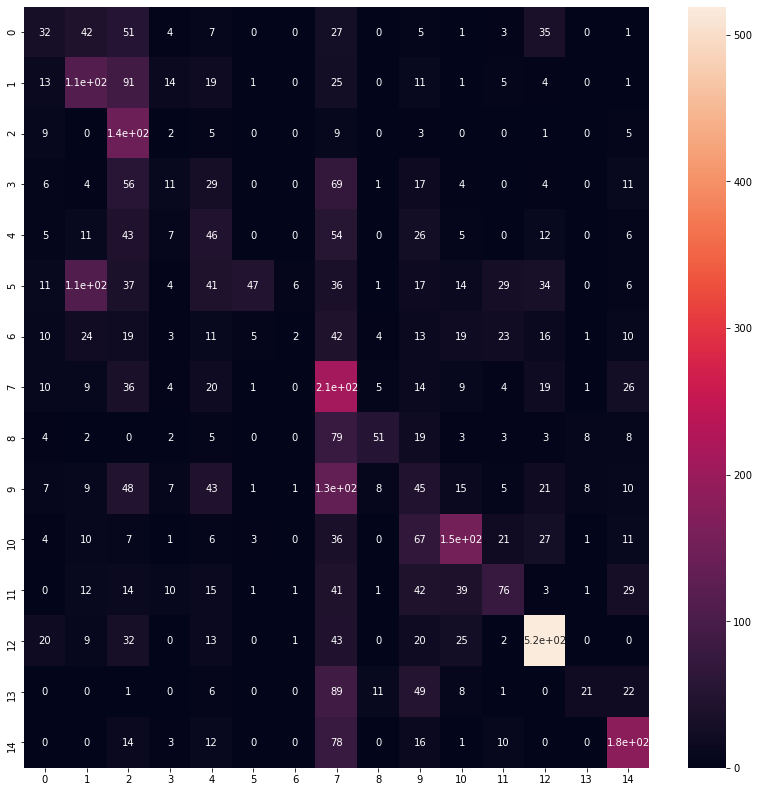

In [13]:
plt.figure(figsize=(14,14))
confusion = confusion_matrix(actual_output, preds)
sns.heatmap(confusion, annot = True)

In [14]:
print("confusion_matrix \n")
print(confusion_matrix(actual_output, preds))

print("\n classification-report: \n")
print(classification_report(actual_output, preds))

confusion_matrix 

[[ 32  42  51   4   7   0   0  27   0   5   1   3  35   0   1]
 [ 13 113  91  14  19   1   0  25   0  11   1   5   4   0   1]
 [  9   0 143   2   5   0   0   9   0   3   0   0   1   0   5]
 [  6   4  56  11  29   0   0  69   1  17   4   0   4   0  11]
 [  5  11  43   7  46   0   0  54   0  26   5   0  12   0   6]
 [ 11 108  37   4  41  47   6  36   1  17  14  29  34   0   6]
 [ 10  24  19   3  11   5   2  42   4  13  19  23  16   1  10]
 [ 10   9  36   4  20   1   0 211   5  14   9   4  19   1  26]
 [  4   2   0   2   5   0   0  79  51  19   3   3   3   8   8]
 [  7   9  48   7  43   1   1 130   8  45  15   5  21   8  10]
 [  4  10   7   1   6   3   0  36   0  67 154  21  27   1  11]
 [  0  12  14  10  15   1   1  41   1  42  39  76   3   1  29]
 [ 20   9  32   0  13   0   1  43   0  20  25   2 519   0   0]
 [  0   0   1   0   6   0   0  89  11  49   8   1   0  21  22]
 [  0   0  14   3  12   0   0  78   0  16   1  10   0   0 183]]

 classification-report: 

        

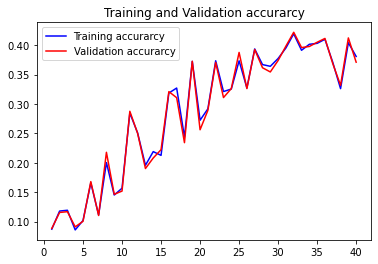

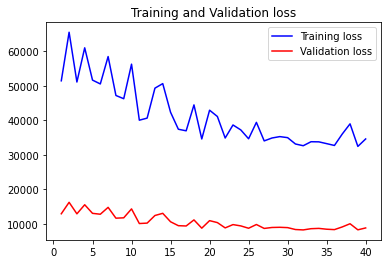

In [15]:
# acc = hist.history['accuracy']
acc = model.acc
loss = model.losses
val_acc = model.val_acc
val_loss = model.val_loss
# val_acc = hist.history['val_accuracy']
# loss = hist.history['loss']
# val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [16]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [17]:
from keras.utils import to_categorical

c:\users\captan pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


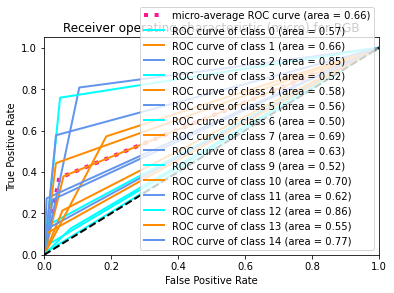

In [33]:
Fpr = dict()
Tpr = dict()

# y_test = to_categorical(y_test)
# yhat = to_categorical(yhat)
lw = 2

Roc_auc = dict()
for i in range(15):
    Fpr[i], Tpr[i], _ = roc_curve(y_test[:, i],preds[:, i])
    Roc_auc[i] = auc(Fpr[i], Tpr[i])
    
    
Fpr["micro"], Tpr["micro"], _ = roc_curve(y_test.ravel(), preds.ravel())
Roc_auc["micro"] = auc(Fpr["micro"], Tpr["micro"])


all_Fpr = np.unique(np.concatenate([Fpr[i] for i in range(15)]))

mean_Tpr = np.zeros_like(all_Fpr)
for i in range(15):
    mean_Tpr += interp(all_Fpr, Fpr[i], Tpr[i])

mean_Tpr /= 15

Fpr["macro"] = all_Fpr
Tpr["macro"] = mean_Tpr
Roc_auc["macro"] = auc(Fpr["macro"], Tpr["macro"])

plt.figure(1)
plt.plot(Fpr["micro"], Tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(Fpr[i], Tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, Roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (micro) for RGB')
plt.legend(loc="lower right")
plt.show()


In [21]:
y_test = np.load('y_test_ann.npy',allow_pickle=True)

In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
preds

array([ 7,  7, 10, ..., 10, 10, 12], dtype=int64)

In [25]:
preds = to_categorical(preds)

In [26]:
print(preds)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
